In [1]:
%matplotlib inline

# USR example visualization

In [2]:
from math import sqrt
import numpy as np
import skimage
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
from scipy.spatial import distance

## Detect dots in image

In PyMol, generate ligand view with spheres and dots (use dots representation in this notebook):

```
load ligand.pdb
hide all
show spheres
# Display > Blackground > White

# SPHERES
ray 300, 500
png ligand_spheres.png, dpi=300

# DOTS
color grey, all
set sphere_scale, 0.2, (all)
ray 300, 500
png ligand_dots.png, dpi=300
```

In [4]:
image = skimage.io.imread("ligand_dots.png")[:,:,:-1]
image = rgb2gray(image)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

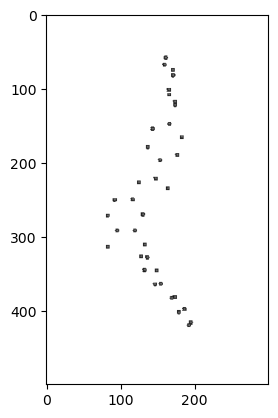

In [5]:
plt.imshow(image, cmap="gray")

In [6]:
blobs_log = blob_log(image, max_sigma=10, min_sigma=2, num_sigma=1, overlap=0.0001, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image, max_sigma=10, threshold=.02)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['orange', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

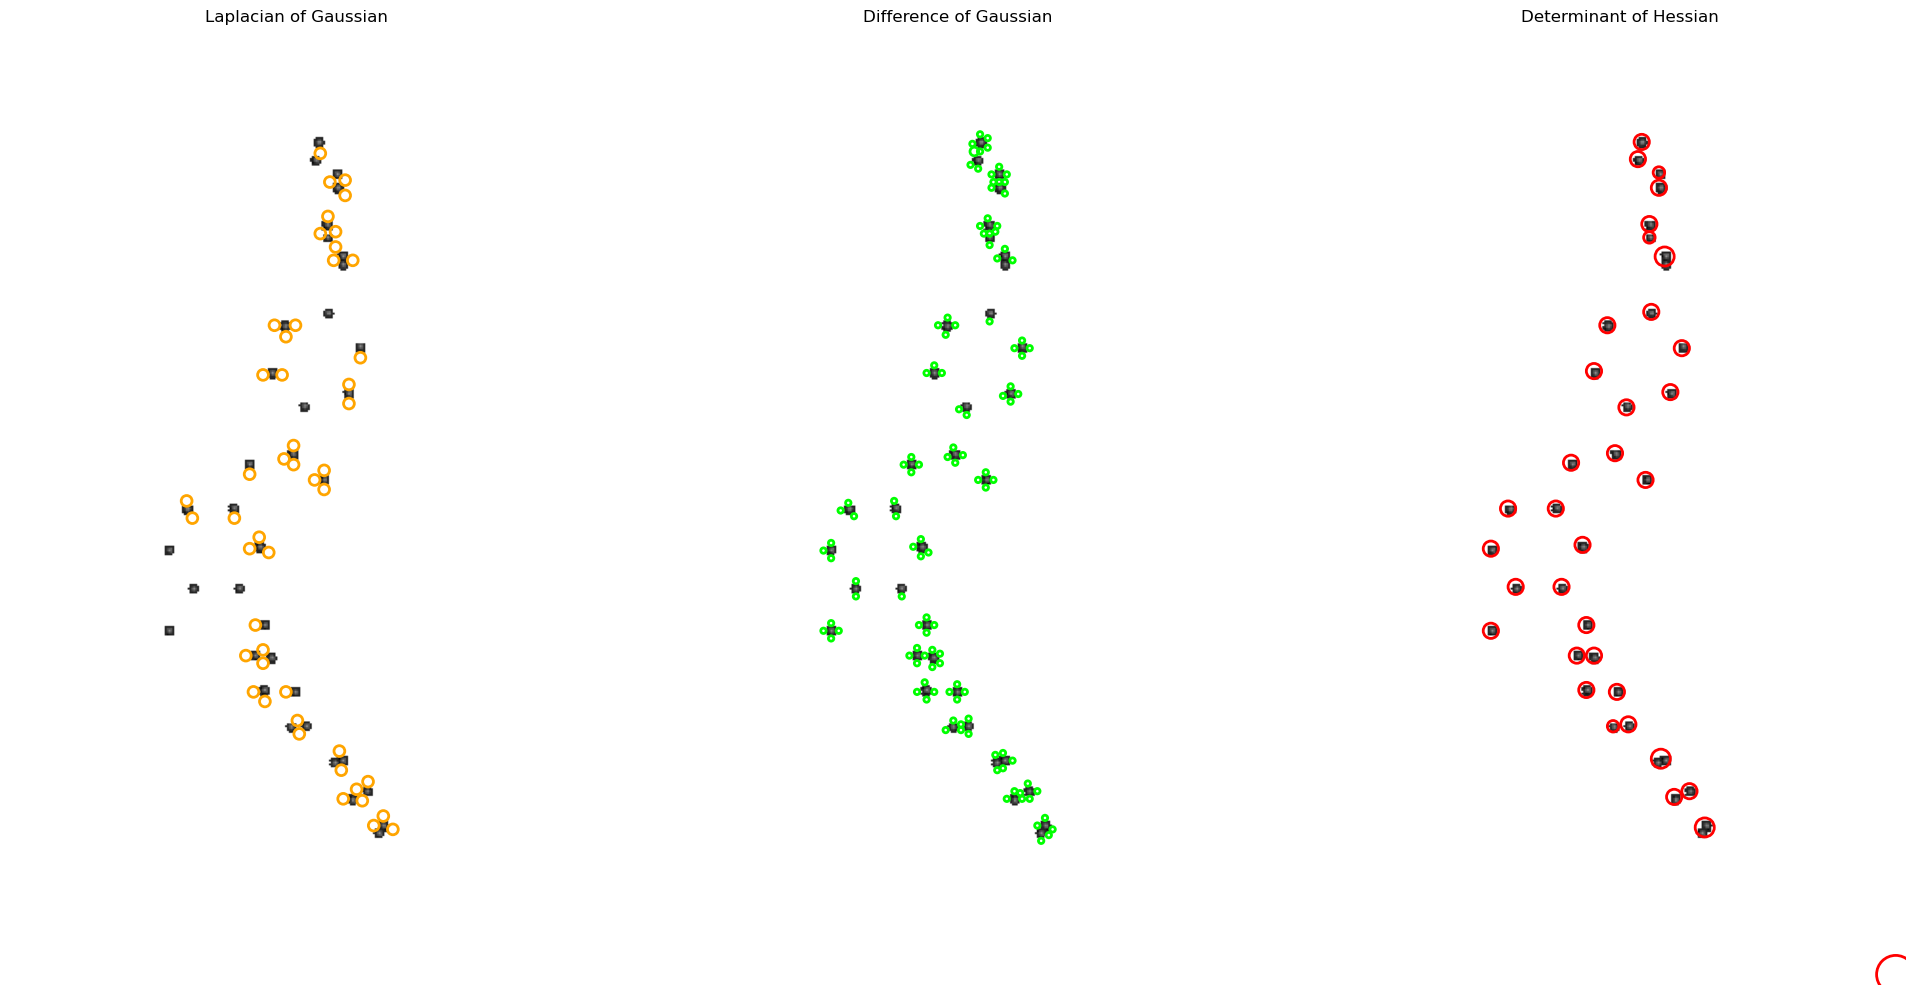

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, cmap="gray")
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [8]:
xyr = blobs_list[-1]
xyr = xyr[xyr[:,2] < 8]
xy = xyr[:, :-1]

array([[345., 132.],
       [154., 143.],
       [327., 136.],
       [269., 130.],
       [ 58., 161.],
       [398., 186.],
       [ 82., 170.],
       [250., 116.],
       [250.,  91.],
       [ 67., 159.],
       [291.,  95.],
       [235., 163.],
       [197., 153.],
       [271.,  82.],
       [221., 147.],
       [147., 166.],
       [178., 136.],
       [291., 119.],
       [363., 154.],
       [364., 146.],
       [311., 132.],
       [346., 148.],
       [189., 176.],
       [401., 178.],
       [166., 182.],
       [226., 124.],
       [314.,  82.],
       [108., 165.],
       [327., 127.],
       [417., 194.],
       [ 74., 170.],
       [381., 171.],
       [118., 173.],
       [101., 165.]])

## Calculate reference points

In [9]:
def get_extreme_point(points, ref_point, how="closest"):
    distances = np.apply_along_axis(lambda x: np.linalg.norm(x), 1, (points - ref_point))
    if how == "closest":
        target_point = xy[np.argmin(distances)]
    elif how == "farthest":
        target_point = xy[np.argmax(distances)]
    else:
        raise ValueError(f"Unknown.")    
    return target_point

In [26]:
x_centroid = sum(xy[:, 0]) / len(xy)
y_centroid = sum(xy[:, 1]) / len(xy)
xy_centroid = [x_centroid, y_centroid]

xy_closest_centroid = get_extreme_point(xy, xy_centroid, how="closest")
xy_farthest_centroid = get_extreme_point(xy, xy_centroid, how="farthest")
xy_farthest_farthest = get_extreme_point(xy, xy_farthest_centroid, how="farthest")

ref_points = [xy_centroid, xy_closest_centroid, xy_farthest_centroid, xy_farthest_farthest]
ref_points_colors = ["#cc0000", "#f1c232", "#6aa84f", "#3d85c6"]

## Plot atoms with ref. points and distances

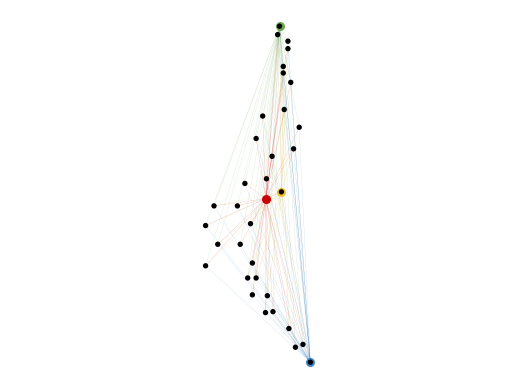

In [27]:
fig, ax = plt.subplots()

# Distances
for ref_point, color in zip(ref_points, ref_points_colors):
    for xy_coord in xy:
        ax.plot([ref_point[1], xy_coord[1]], [ref_point[0], xy_coord[0]], "-", color=color, alpha=0.6, linewidth=0.1, zorder=1)

# Reference points
for ref_point, color in zip(ref_points, ref_points_colors):
    ax.scatter(ref_point[1], ref_point[0], s=30, color=color, zorder=2)

# Atoms
ax.scatter(xy[:, 1], xy[:, 0], s=15, color="k", edgecolor="none", zorder=3)

ax.axis("equal")
plt.gca().invert_yaxis()
plt.gca().axis('off')
plt.savefig("ligand_atoms_2d_usr.png", dpi=300)

## Plot atoms

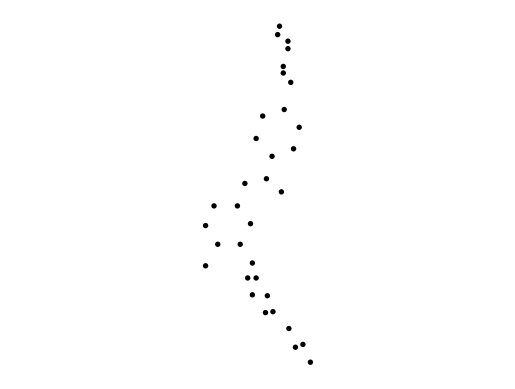

In [19]:
fig, ax = plt.subplots()

# Atoms
ax.scatter(xy[:, 1], xy[:, 0], s=15, color="k", edgecolor="none")

ax.axis("equal")
plt.gca().invert_yaxis()
plt.axis('off')
plt.savefig("ligand_atoms_2d.png", dpi=300)